<a href="https://colab.research.google.com/github/Praaathaamesh/DL-API-Management/blob/main/Config/CDSS_DataPipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CDSS Data Pipeline**
****

_Author: Prathamesh Pradeep Jadhav_

## Implicative Purpose

- A part of a broader project involving creation of clinical decision support system for diagnosis of ALVF caused by CM, leading to untimely/unforseen cardiac arrest.
- To streamline the data integration and pre-processing step for model training using PTB-XL dataset.
- Further inclusions are yet to be made.
- This file will undergo series of multiple modification throughout the course of this project.
- Decisions will be made based upon the final data product architecture.

## Usage Terms

- Notebook will be used for temporal basis to analyse the efficiency. Later can be sampled into a sufficable package/module or even a software
- Suggestive use must be of the academic cases only.

## Considerations

- Under the management of subsequent repository and MIT license.
- Implementation is yet to be done.

## External Links

- [CDSS-DL API Management Repository](https://github.com/Praaathaamesh/DL-API-Management)
- [Wagner, P., Strodthoff, N., Bousseljot, RD. et al. PTB-XL, a large publicly available electrocardiography dataset. Sci Data 7, 154 (2020)](https://doi.org/10.1038/s41597-020-0495-6)


## Import Important Packages and Mount the Drive

In [ ]:
import os
import sys
import ast
import math
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from scipy import signal
from google.colab import drive
import matplotlib.pyplot as plt

In [ ]:
# ATTENTION: RUN THIS BLOCK TO MOUNT THE GOOGLE DRIVE STORAGE WITHOUT DIRECT AUTHORISATION (EVADES PESKY AUTHORISATION MAIL SPAM)

# Mount the drive (Auto authorisation)
# from google.colab import auth
# auth.authenticate_user()
# from google.auth import default
# creds, _ = default()
# drive.mount('/content/drive')

In [ ]:
#!pip install h5py
#!pip install typing-extensions
#!pip install wheel
#!pip install wfdb


# Footnote: install if not already installed in the runtime. Might need to re-run for newer runtimes.

In [ ]:
# !unzip "/content/drive/MyDrive/Projects/CDSS_DLComponentRepo/ptb-xl.zip" -d "/content/drive/MyDrive/Projects/CDSS_DLComponentRepo/"

In [ ]:
if os.path.exists("/content/drive/MyDrive/Projects/CDSS_DLComponentRepo/ptb-xl"):
  print("Following directory exists without any exceptions!")

Following directory exists without any exceptions!


## Check Case: Check if runtime has GPU connected

In [ ]:
# Check Case 1 : List availible GPUs - returns a Null if no GPU detected!
GPUDevice = tf.test.gpu_device_name()
print(GPUDevice)

# Footnote: This runtime doesn't use the GPU. Switch to T4 GPU runtime for more flexibility.

In [ ]:
# Check Case 2: See if the session supports the GPU inclusion
try:
  print(tf.test.is_built_with_gpu_support())
except:
  raise SystemError("No GPU support for a given runtime!")

# Configuring physical devices list
print(f"Total list of devices:\n{tf.config.list_physical_devices()}")
print(f"\nLisitng the first device type:{tf.config.list_physical_devices()[0][1]} ")

True
Total list of devices:
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

Lisitng the first device type:CPU 


## Load the Data

### _Loading Signal Data using WFDB (Uncomment it to continue without pickling)_

In [ ]:
# Define database path
# Path_to_dataset = "/content/drive/MyDrive/Projects/CDSS_DLComponentRepo/ptb-xl/1.0.3/"

In [ ]:
# Loading metadata of database
# Y = pd.read_csv(Path_to_dataset+"ptbxl_database.csv", index_col="ecg_id")

In [ ]:
# Check Case 3: visualise metadata and data integrity
# Y.columns  # To see the columns
# Y.iloc[1]  # To see the individual entries


In [ ]:
# Eval and convert scp codes into a string
# Y.scp_codes = Y.scp_codes.apply(lambda x: ast.literal_eval(x))

In [ ]:
# Check Case 4: see individual signal data records (data file and header file)
#try:
#  Dat, Head = wfdb.rdsamp(Path_to_dataset+Y.iloc[0].filename_lr) # data of entry first
#  Dat.shape
#except:
#  print("heavy error! Data mangled! Please analyse further!")
#
#del Dat; del Head # No need futher

In [ ]:
# Define fucntion to load raw data
if False:
  '''
  def loadRaw(df, SampRate, Path):
    # Load meta first use the filename column to import the signal data
    if SampRate == 100:
      Data = [wfdb.rdsamp(Path+file) for file in df.filename_lr]
    else:
      Data = [wfdb.rdsamp(Path+file) for file in df.filename_hr]
    # Eliminate the signal data
    Data = np.array([sig for sig, meta in Data ])
    return Data

  # Define the sampling rate
  Sampling_Rate = 100
  '''

In [ ]:
# Loading the actual data
if False:
  '''
  try:
    X = loadRaw(Y, Sampling_Rate, Path_to_dataset)
  except:
    ImportError("No leads found. Please asses the previous steps")
  '''

In [ ]:
# Saving the data object as pkl file for greater usability

if False:
  '''
  # Here we have created data object X (took 5 hours to load)
  with open("/content/drive/MyDrive/Projects/CDSS_DLComponentRepo/X.pkl", "wb") as f:
    pickle.dump(X, f)
  '''

In [ ]:
# to get the objects back

with open("/content/drive/MyDrive/Projects/CDSS_DLComponentRepo/saved_state_pkl/X.pkl", "rb") as f:
  X = pickle.load(f)

In [ ]:
X.shape

(21799, 1000, 12)

In [ ]:
# Single entry: a multidimensional numpy array
X[1]

array([[ 0.004,  0.138,  0.134, ...,  0.192,  0.083,  0.088],
       [-0.02 ,  0.116,  0.136, ...,  0.156,  0.057,  0.063],
       [-0.053,  0.092,  0.145, ...,  0.107,  0.013,  0.022],
       ...,
       [ 0.121,  0.398,  0.277, ..., -1.065, -0.492, -0.156],
       [-0.326,  0.057,  0.383, ..., -0.28 , -0.175, -0.071],
       [-0.348, -0.056,  0.292, ..., -0.308, -0.231, -0.145]])

## Load Metadata (Uncomment to load without pickling)

In [ ]:
# Adding diagnostic superclass to each entry
# AggData = pd.read_csv(Path_to_dataset+"scp_statements.csv", index_col=0)
# AggData.columns

In [ ]:
# Keeping entries only with the diagnostic report
# AggData = AggData[AggData.diagnostic == 1]

In [ ]:
# def AggDataFunc(ScpDict):
#   TempList = []
#   for key in ScpDict.keys():
#     if key in AggData.index:
#       TempList.append(AggData.loc[key].diagnostic_class)
#   return list(set(TempList))

In [ ]:
# Y["diagnostic_superclass"] = Y.scp_codes.apply(AggDataFunc)

In [ ]:
# Here we have created data object Y
# with open("/content/drive/MyDrive/Projects/CDSS_DLComponentRepo/Y.pkl", "wb") as f:
#  pickle.dump(Y, f)

In [ ]:
# Here we have created data object Y
with open("/content/drive/MyDrive/Projects/CDSS_DLComponentRepo/saved_state_pkl/Y.pkl", "rb") as f:
  Y = pickle.load(f)

In [ ]:
Y.head()

,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,...,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,diagnostic_superclass
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,sinusrhythmus periphere niederspannung,...,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr,[NORM]
2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,sinusbradykardie sonst normales ekg,...,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr,[NORM]
3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,sinusrhythmus normales ekg,...,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr,[NORM]
4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,sinusrhythmus normales ekg,...,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr,[NORM]
5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,sinusrhythmus normales ekg,...,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr,[NORM]


## Data Processing & Refinement

- **Apparent Goals:**
  - To streamline the data integration and pre-processing step for model training using PTB-XL dataset.
  - Further inclusions are yet to be made.
  - First of all, normalise the metadata of dataset by analysing each and every column.
  - For the signals, find the suitable normalisation and filtering techniques.
  - Define proper label for HYP patients with higher risk.

- **Considerations:**
  - Target label will be of proxy nature.
  - Here, we are determining the patients with higher susceptibility to ALVF.
  - We are not diagnosing or prognosing anything; it is a screening model and modifications must be done accordingly.
  - ALVF diagnosis requires the LVEF metric, which is absent in this one, hence, it is merely difficult to surely say if they are infact ALVF patients or not?
  - **Hence, not having specific metric to call a patient ALVF ridden, all we can do is call them susceptible.**
  - Proxy labels are acceptable only if literature is backing the claim of change.
  - for now the major objectives are:
    - Perform EDA. Find Notebook here: [CDSS DL EDA](https://colab.research.google.com/drive/1walTNvC8k1NvT7d3plsRZirv4-HlA2rO#scrollTo=5Cax56lIqY9o)
    - Persent your claim with specified literature.
    - Specify what you want to change and how it can be done
    - Change the normal to proxy label.
    - Then consider splitting the data.

### _Claim, Literature Backing & Action_

Note: Refer [CDSS DL EDA](https://colab.research.google.com/drive/1walTNvC8k1NvT7d3plsRZirv4-HlA2rO#scrollTo=5Cax56lIqY9o) for more comprehensive view.

In a gist:
- Literature regarding ALVF (Bacharova 2023, Wagner 2020, Bergamasco 2022, McDonagh 1997, Raymond 2003,Sara 2020) has suggested:
  - "as age increases the susceptibility to ALVF also increases (overall prevalence in male is still arounf 1.5%, yet this holds true), yet many men at later stages of their life are prone to this than women of the same age range"
  - "Men with ALV systolic dysfunction have more chances of mortality than women with AL Diastolic dysfunction"
  - "prevalence for men at 50 years of age is approx. 4.5% and it goes up abpve 10% if age is above 70 years."
  - "Men have more cases of AL systolic dysfunction whereas women have more cases of diastolic dysfunction."
- Visualisations from [CDSS DL EDA](https://colab.research.google.com/drive/1walTNvC8k1NvT7d3plsRZirv4-HlA2rO#scrollTo=5Cax56lIqY9o) have supported such claims. Hence, the core idea suffices the action of adding the proxy label "HYP_HR" (HR stands for High Risk).
- So, which entries we must consider as high risk:
  - After performing EDA, 769 HYP LVH entries had any one of these following form statements:
    - STD
    - STE
    - HVOLT
    - LVOLT
    - VCLVH
  - Any one of these form statements in scp_codes hash table can be deemed as an **high risk individual**!
- Take a reference from EDA pipeline and get those entries and according to some unique identifier (patient_id or other), change their diagnostic label as **HYP_HR**.
- Following code-blocks do these things as expected!

### _Loading Susceptible Dataframe_

In [ ]:
# Load the ALVF dataset made during EDA
with open("/content/drive/MyDrive/Projects/CDSS_DLComponentRepo/saved_state_pkl/ALVF_df.pkl", "rb") as f:
  ALVF_df = pickle.load(f)

In [ ]:
ALVF_df.head()

,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,...,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,diagnostic_superclass
0,340.0,85.0,1,160.0,40.0,3.0,1.0,AT-6 C 5.5,1986-09-07 14:05:32,sinus rhythm. left atrial enlargement. voltage...,...,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00273_lr,records500/00000/00273_hr,"[STTC, HYP]"
1,5662.0,67.0,1,152.0,60.0,11.0,1.0,AT-6 C 5.5,1986-09-07 14:11:43,sinus rhythm. possible left atrial enlargement...,...,NaN,NaN,NaN,NaN,NaN,NaN,10,records100/00000/00274_lr,records500/00000/00274_hr,"[HYP, STTC, MI]"
2,3192.0,76.0,1,168.0,54.0,10.0,1.0,AT-6 C 5.5,1986-09-10 13:14:44,sinus bradycardia with sinus arrhythmia. the c...,...,NaN,NaN,NaN,NaN,NaN,NaN,3,records100/00000/00284_lr,records500/00000/00284_hr,"[STTC, HYP]"
3,340.0,85.0,1,160.0,40.0,7.0,1.0,AT-6 C 5.5,1986-09-12 12:53:42,sinus rhythm. left atrial enlargement. voltage...,...,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00298_lr,records500/00000/00298_hr,"[HYP, STTC, MI]"
4,1110.0,56.0,1,165.0,73.0,1.0,1.0,AT-6 C 5.5,1986-09-13 15:10:13,sinus rhythm. voltages are high in chest leads...,...,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00313_lr,records500/00000/00313_hr,[HYP]


Considering these `patient_ids`, we can change the diagnostic labels in the main metadata variable. Dataset mentioned above incldues entries which are susceptible entries.

### _Changing Labels as Risky Dataframe_

In [ ]:
# proxy variable for ALVF DF
ALVF_df_testcase = ALVF_df

In [ ]:
# proxy variable for OG DF
Y_test_case = Y

In [ ]:
Y_test_case.head()

,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,...,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,diagnostic_superclass
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,sinusrhythmus periphere niederspannung,...,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr,[NORM]
2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,sinusbradykardie sonst normales ekg,...,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr,[NORM]
3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,sinusrhythmus normales ekg,...,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr,[NORM]
4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,sinusrhythmus normales ekg,...,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr,[NORM]
5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,sinusrhythmus normales ekg,...,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr,[NORM]


In [ ]:
# get patient ids
ALVF_id_set = set(ALVF_df_testcase['patient_id'])

# Function for replacing HYP to HYP_HR in DS list
def Replace_HYP(string_list):
  if "HYP" in string_list:
    return [s.replace("HYP", "HYP_HR") if "HYP" == s else s for s in string_list]
  return string_list

# Parse OG and ALVF dataframes
Y_test_case.loc[Y_test_case['patient_id'].isin(ALVF_id_set), "diagnostic_superclass"] = \
 Y_test_case.loc[Y_test_case['patient_id'].isin(ALVF_id_set), "diagnostic_superclass"].apply(Replace_HYP)

In [ ]:
Y_test_case[260:270]

,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,...,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,diagnostic_superclass
ecg_id,,,,,,,,,,,,,,,,,,,,,
268,2533.0,57.0,0,165.0,72.0,5.0,1.0,AT-6 C 5.5,1986-09-06 15:54:13,sinus rhythm. no definite pathology.,...,NaN,NaN,NaN,NaN,NaN,NaN,1,records100/00000/00268_lr,records500/00000/00268_hr,[NORM]
269,2282.0,87.0,1,166.0,70.0,8.0,1.0,AT-6 C 5.8,1986-09-06 16:11:01,premature atrial contraction(s). sinus rhythm....,...,NaN,NaN,NaN,NaN,NaN,NaN,8,records100/00000/00269_lr,records500/00000/00269_hr,"[CD, MI]"
270,1480.0,50.0,0,188.0,93.0,7.0,1.0,AT-6 C 5.5,1986-09-06 19:26:43,sinus tachycardia. qs complexes in v2 and tiny...,...,NaN,NaN,NaN,NaN,NaN,NaN,4,records100/00000/00270_lr,records500/00000/00270_hr,[MI]
271,449.0,75.0,0,168.0,75.0,8.0,1.0,AT-6 C 5.5,1986-09-06 23:56:41,premature atrial contraction(s). sinus rhythm....,...,NaN,NaN,NaN,NaN,NaN,NaN,10,records100/00000/00271_lr,records500/00000/00271_hr,"[HYP, STTC, MI]"
272,1027.0,54.0,0,180.0,83.0,11.0,1.0,AT-6 C 5.5,1986-09-07 11:36:22,sinus rhythm. normal ecg.,...,NaN,NaN,NaN,NaN,NaN,NaN,4,records100/00000/00272_lr,records500/00000/00272_hr,[NORM]
273,340.0,85.0,1,160.0,40.0,3.0,1.0,AT-6 C 5.5,1986-09-07 14:05:32,sinus rhythm. left atrial enlargement. voltage...,...,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00273_lr,records500/00000/00273_hr,"[STTC, HYP_HR]"
274,5662.0,67.0,1,152.0,60.0,11.0,1.0,AT-6 C 5.5,1986-09-07 14:11:43,sinus rhythm. possible left atrial enlargement...,...,NaN,NaN,NaN,NaN,NaN,NaN,10,records100/00000/00274_lr,records500/00000/00274_hr,"[HYP_HR, STTC, MI]"
275,1389.0,67.0,1,157.0,44.0,8.0,1.0,AT-6 C 5.5,1986-09-07 14:11:59,sinus rhythm. normal ecg.,...,NaN,NaN,NaN,NaN,NaN,NaN,1,records100/00000/00275_lr,records500/00000/00275_hr,[NORM]
276,5087.0,76.0,1,160.0,67.0,7.0,1.0,AT-6 C 5.5,1986-09-07 15:48:20,sinus rhythm. minor non-specific t wave flatte...,...,NaN,NaN,NaN,NaN,NaN,NaN,6,records100/00000/00276_lr,records500/00000/00276_hr,[STTC]


**The susceptible entries have been updated as per the EDA claims we made! Now we can successfully proceeed to dataset splitting!**

### _Purging Bad Quality Data_

**Why? & How?**
- Rather than proceeding with previously split data, it is essential for us to preserve only the high quality entries–so find if the official literature has any kind of mention for signal anomalies or the mention of signal data preprocessing and normalisation.
- If there is some mention, rectify the sub-optimal entries and proceed with learning the essential API for preprocessing
- Perform required preprocessing and proceed for model building.

**Leads found in the documentation**
- 77.01% entries are of high-quality; regardless of the folds.
- According to them, entries with any non-empty value in following columns can simply be purged or removed from the entire dataset:
  - Baseline_drift
  - Static_noise
  - Burst_noise
  - Electrode_problem
  - Extra_beats
  - pace_maker

<br>

****

<br>

For more reference, please use this original reference paper:

[Wagner, P., Strodthoff, N., Bousseljot, RD. et al. PTB-XL, a large publicly available electrocardiography dataset. Sci Data 7, 154 (2020)](https://doi.org/10.1038/s41597-020-0495-6)

In [ ]:
# Before purge
print(f"The shape before the purge is: {Y_test_case.shape}")

The shape before the purge is: (21799, 28)


In [ ]:
# Low quality data purging
Y_test_case = Y_test_case[Y_test_case[['baseline_drift', 'static_noise', 'burst_noise','extra_beats', 'pacemaker', 'electrodes_problems']].isna().all(axis = 1)]

In [ ]:
# After Purge
print(f"The shape after the purge is: {Y_test_case.shape}")

The shape after the purge is: (15189, 28)


- **Reduced size and shape** of the data defines that the purging has been done successfully! The process has significantly reduced the size by **6610 entries. (about 30.32%)**
- Another significant aspect of such proportion is that, **The literature claims that 77.01% entries are of highest quality and we have gotten somewhat proximal estimate here! We are on a good track for now.**


In [ ]:
# Before purge
print(f"The shape before the purge is: {Y_test_case.shape}")

The shape before the purge is: (15189, 28)


In [ ]:
# Purgign entries without any diagnosis
Y_test_case = Y_test_case[Y_test_case['diagnostic_superclass'].map(bool)]

In [ ]:
# After purge
print(f"The shape after the purge is: {Y_test_case.shape}")

The shape after the purge is: (15114, 28)


- **Out of total 15189 entries, only 15114 remain!**

In [ ]:
Y_test_case.head(20)

,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,...,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,diagnostic_superclass
ecg_id,,,,,,,,,,,,,,,,,,,,,
2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,sinusbradykardie sonst normales ekg,...,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr,[NORM]
3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,sinusrhythmus normales ekg,...,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr,[NORM]
7,16193.0,54.0,0,NaN,83.0,2.0,0.0,CS-12 E,1984-11-28 13:32:22,"sinusrhythmus linkstyp t abnormal, wahrscheinl...",...,NaN,NaN,NaN,NaN,NaN,NaN,7,records100/00000/00007_lr,records500/00000/00007_hr,[NORM]
10,9456.0,22.0,1,NaN,56.0,2.0,0.0,CS-12 E,1984-12-12 14:12:46,sinusrhythmus normales ekg,...,NaN,NaN,NaN,NaN,NaN,NaN,9,records100/00000/00010_lr,records500/00000/00010_hr,[NORM]
12,11031.0,43.0,1,NaN,44.0,2.0,0.0,CS-12 E,1984-12-21 08:02:26,sinusbradykardie sonst normales ekg,...,NaN,NaN,NaN,NaN,NaN,NaN,8,records100/00000/00012_lr,records500/00000/00012_hr,[NORM]
14,12925.0,19.0,1,NaN,58.0,2.0,0.0,CS-12 E,1985-01-10 11:45:19,sinusrhythmus normales ekg,...,NaN,NaN,NaN,NaN,NaN,NaN,7,records100/00000/00014_lr,records500/00000/00014_hr,[NORM]
19,11116.0,20.0,0,NaN,85.0,2.0,0.0,CS-12 E,1985-01-23 11:23:00,sinusrhythmus p-verbreiterung,...,NaN,NaN,NaN,NaN,NaN,NaN,7,records100/00000/00019_lr,records500/00000/00019_hr,[NORM]
21,17102.0,19.0,1,NaN,58.0,2.0,0.0,CS-12 E,1985-01-25 10:31:52,sinusrhythmus normales ekg,...,NaN,NaN,NaN,NaN,NaN,NaN,6,records100/00000/00021_lr,records500/00000/00021_hr,[NORM]
22,20978.0,17.0,1,NaN,53.0,2.0,0.0,CS-12 E,1985-01-25 12:33:18,sinusrhythmus linkstyp unspezifisches abnormal...,...,NaN,NaN,NaN,NaN,NaN,NaN,4,records100/00000/00022_lr,records500/00000/00022_hr,[STTC]


- Though indexing is something we have to work on, data has been successfully assorted to be of the highest quality; evidentby above overview.

### _Signal Normalisation: Butterworth Highpass/Lowpass Filtering_

> **What Signal Normalisation actually leads to?**
  - Due to the presence of raw signal data, many numerical values often lead to signal anomalies
  - Removing the muscle artifacts, causing higher peaks (Use Butterworth highpass filter)
  - Removing the baseline wander, causing deviation from baseline (Use Butterworth lowpass flter)

> **What is the significance of bandpass filtering?**
  - Allowing the signals in a specific range and refers to any other artifacts as noise.
  - It refuses to allow these artifacts.
  - Only lets the relevent frequencies in!

> **Why notch filtering and powerline interference is contained here?**

  - Simple answer is-There's no need to comply with additional filtering criteria, since most of the signal data has already been normalised to some extent.
  -  Apart from purging unwanted and diagnostically-insignificant entries, only bandpass filtering is a probable choice since [CDSS DL EDA](https://colab.research.google.com/drive/1walTNvC8k1NvT7d3plsRZirv4-HlA2rO#scrollTo=5Cax56lIqY9o) has revealed baseline wander in data, which **has to be** metigated!

In [ ]:
# Single Entry as NP Multidimesional Array
X[1]

array([[ 0.004,  0.138,  0.134, ...,  0.192,  0.083,  0.088],
       [-0.02 ,  0.116,  0.136, ...,  0.156,  0.057,  0.063],
       [-0.053,  0.092,  0.145, ...,  0.107,  0.013,  0.022],
       ...,
       [ 0.121,  0.398,  0.277, ..., -1.065, -0.492, -0.156],
       [-0.326,  0.057,  0.383, ..., -0.28 , -0.175, -0.071],
       [-0.348, -0.056,  0.292, ..., -0.308, -0.231, -0.145]])

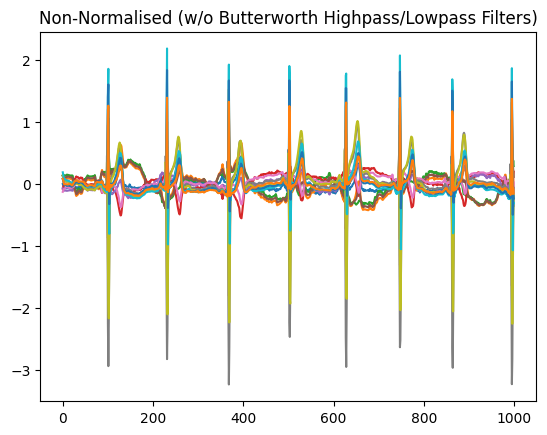

In [ ]:
# Plot all together
plt.plot(X[1])
plt.title("Non-Normalised (w/o Butterworth Highpass/Lowpass Filters)")
plt.show()

Baseline wander is apparent & it needs to be fixed!

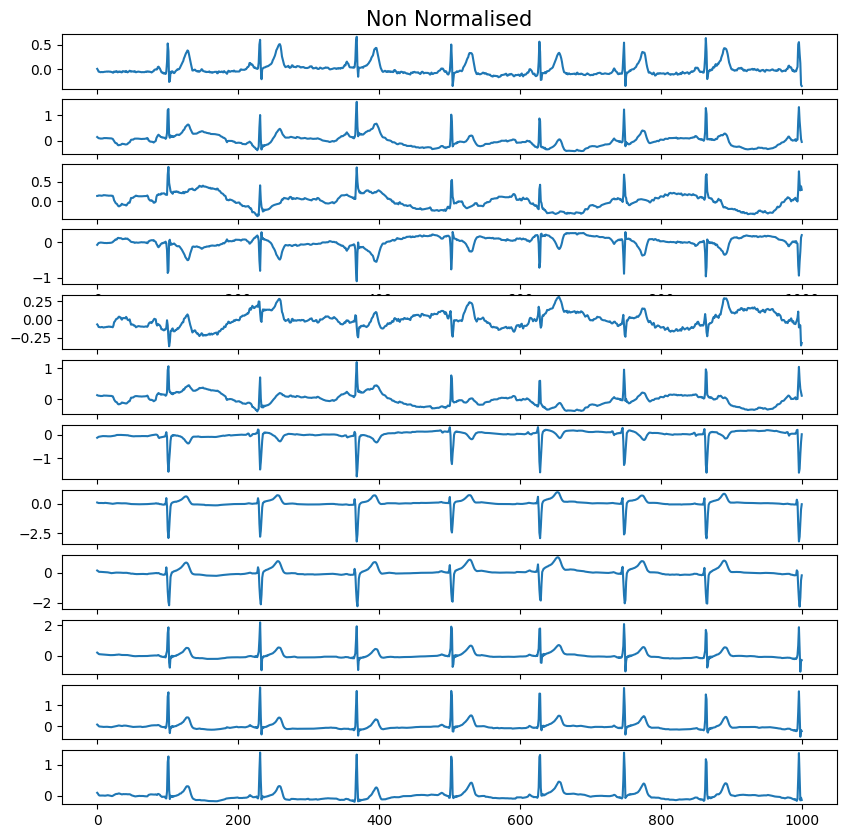

In [ ]:
# Normal patient ECG of 12 leads (Non Normalised)
X_ = X[1] # one signal
Bar, Axes = plt.subplots(X_.shape[1], 1, figsize = (10,10)) # define number of subplots and size

# Set title
Title = f"Non Normalised"
Axes[0].set_title(Title, fontsize = 15)

for c in np.arange(X_.shape[1]): # plot each lead signal in each subplots
  sns.lineplot(x= np.arange(X_.shape[0]),
               y= X_[:, c],
               ax= Axes[c])

#plt.tight_layout()
plt.show()

In [ ]:
# Creating the Butterworth filter functions

def butter_highpass(cutoff, fs, order = 5):
  nyq = 0.5 * fs
  norm_cutoff = cutoff / nyq
  pre_req = signal.butter(order,
                          norm_cutoff,
                          btype = "highpass",
                          output = 'sos',
                          analog = False)
  return pre_req

def butter_lowpass(cutoff, fs, order = 5):
  nyq = 0.5 * fs
  norm_cutoff = cutoff / nyq
  pre_req = signal.butter(order,
                          norm_cutoff,
                          btype = "lowpass",
                          output = 'sos',
                          analog = False)
  return pre_req

# Applying these
def apply_filter(data, filter_pre_req, axis = -1):
  filtered_data = signal.sosfiltfilt(filter_pre_req, data, axis = axis)
  return filtered_data

In [ ]:
# Aplying butterworth filter functions with custom parameters

# Parameter set
FS = 100
ORDER = 4
HIGHPASS_CUTOFF = 0.5
LOWPASS_CUTOFF = 40.0

# instantiate HP
HP_pre_req = butter_highpass(HIGHPASS_CUTOFF,
                             FS,
                             ORDER)
DataFiltHP = apply_filter(X, HP_pre_req, axis = 1)

# instantiate LP
LP_pre_req = butter_lowpass(LOWPASS_CUTOFF,
                             FS,
                             ORDER)
DataFiltLP = apply_filter(DataFiltHP, LP_pre_req, axis = 1)

In [ ]:
# Check Shape
DataFiltLP.shape

(21799, 1000, 12)

In [ ]:
# Check entry
DataFiltLP[1]

array([[ 0.00212555,  0.06837082,  0.06618152, ...,  0.00404205,
        -0.01120614, -0.00925907],
       [-0.02172353,  0.0473546 ,  0.06897869, ..., -0.02955063,
        -0.03614767, -0.03347551],
       [-0.05139804,  0.02585037,  0.07725086, ..., -0.07397266,
        -0.07751613, -0.07210747],
       ...,
       [ 0.43559115,  0.44361969,  0.00793164, ..., -0.77929966,
        -0.28730787, -0.02705907],
       [ 0.03853154,  0.17603572,  0.13747543, ...,  0.05825254,
         0.08069173,  0.09687322],
       [ 0.0231884 ,  0.03667233,  0.01344566, ...,  0.02336053,
         0.01322728,  0.01433498]])

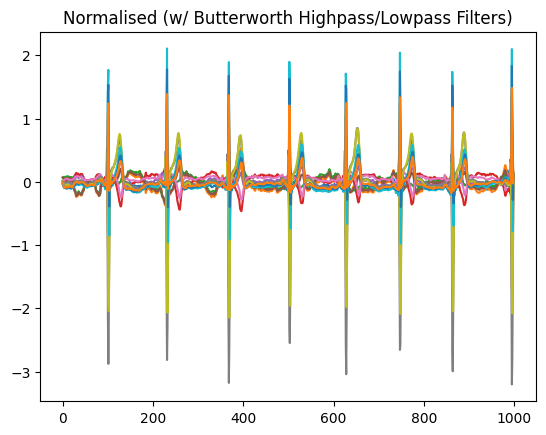

In [ ]:
# Plot all together
plt.plot(DataFiltLP[1])
plt.title("Normalised (w/ Butterworth Highpass/Lowpass Filters)")
plt.show()

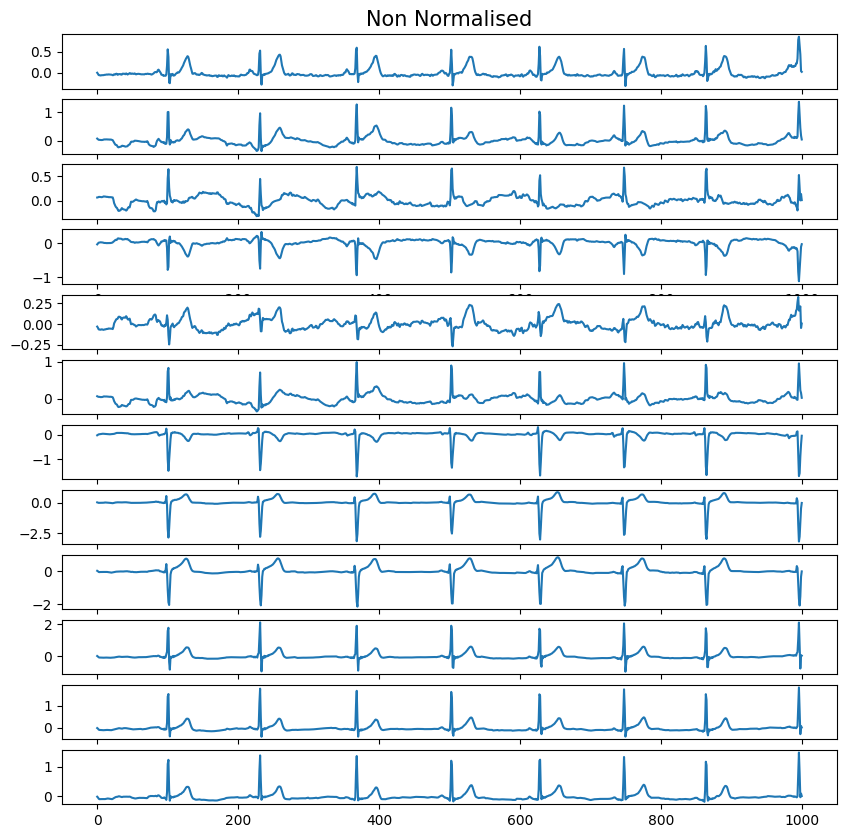

In [ ]:
# Normal patient ECG of 12 leads (Normalised)
X_ = DataFiltLP[1] # one signal
Bar, Axes = plt.subplots(X_.shape[1], 1, figsize = (10,10)) # define number of subplots and size

# Set title
Title = f"Non Normalised"
Axes[0].set_title(Title, fontsize = 15)

for c in np.arange(X_.shape[1]): # plot each lead signal in each subplots
  sns.lineplot(x= np.arange(X_.shape[0]),
               y= X_[:, c],
               ax= Axes[c])

#plt.tight_layout()
plt.show()

In [ ]:
# Define New Signal Data Variable
X_filt = DataFiltLP

- **Required filtering criteria has been achieved. baseline wander is no more.**
-  For more reproducibility, signal data variable has been reassigned with new identifier label.

## Data Splitting & Fold Preparation

Considering the given literature for PTB-XL dataset:
  - The paper recommends **10-fold-stratified split**
  - The paper recommends **10-fold-cross-validation** for validating the performance of the model.
  - Folds are described in `start_fold` columns in the metadata file.
  - Folds 1 to 8 have same patients within same fold.
  - Fold 9 and fold 10 is considered as **high quality folds**, since they went atleast one human evaluation.

For this practice we will perform following splits:

  - Fold 1 to Fold 8 as **training sets**
  - Fold 10 as **the testing set**
  - Fold 9 as **the validation set**
  

****

For more reference, please use this original reference paper:

[Wagner, P., Strodthoff, N., Bousseljot, RD. et al. PTB-XL, a large publicly available electrocardiography dataset. Sci Data 7, 154 (2020)](https://doi.org/10.1038/s41597-020-0495-6)

### _Creating Test Set_

In [ ]:
# test set split
test_fold = 10
X_test = X_filt[np.where(Y_test_case.strat_fold == test_fold)]
Y_test = Y_test_case[(Y_test_case.strat_fold == test_fold)].diagnostic_superclass

In [ ]:
Y_test.shape

(1512,)

In [ ]:
X_test.shape

(1512, 1000, 12)

Here, we have a test set with only entries with designated `strat_fold` value of **fold ten**!

### _Creating Validation Set_

In [ ]:
# validation fold
validation_fold = 9

X_val = X_filt[np.where(Y_test_case.strat_fold == validation_fold)]
Y_val = Y_test_case[(Y_test_case.strat_fold == validation_fold)].diagnostic_superclass

In [ ]:
Y_val.shape

(1479,)

In [ ]:
X_val.shape

(1479, 1000, 12)

Here, we have a validation set with only entries with designated `strat_fold` value of **Fold nine**!

### _Creating Training Set_

In [ ]:
# Train set split
X_train = X_filt[np.where((Y_test_case.strat_fold != test_fold) & (Y_test_case.strat_fold != validation_fold))]
Y_train = Y_test_case[((Y_test_case.strat_fold != test_fold) & (Y_test_case.strat_fold != validation_fold))].diagnostic_superclass

In [ ]:
Y_train.shape

(12123,)

In [ ]:
X_train.shape

(12123, 1000, 12)

Here, we have a training set with only entries with designated `strat_fold` value of **fold one till fold eight**!

> From the split done above, we have found out that:
  - Test set has 1512 entries.
  - Validation set has 1479 entries.
  - Training set has 12123 entries.

> **Altogether they contribute to total of 21799 entries!**